In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz 
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Company_Data.csv")

In [4]:
cp = df.copy()

In [5]:
cp.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
cp.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [8]:
cp.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [9]:
cp.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

C:\Users\Vishnu\.conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


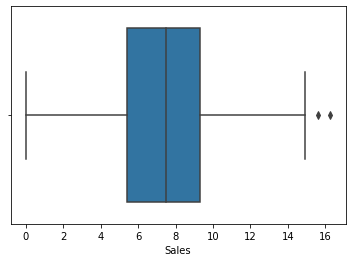

In [10]:
ax = sns.boxplot(cp['Sales'])

In [11]:
plt.rcParams["figure.figsize"] = 9,5 

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


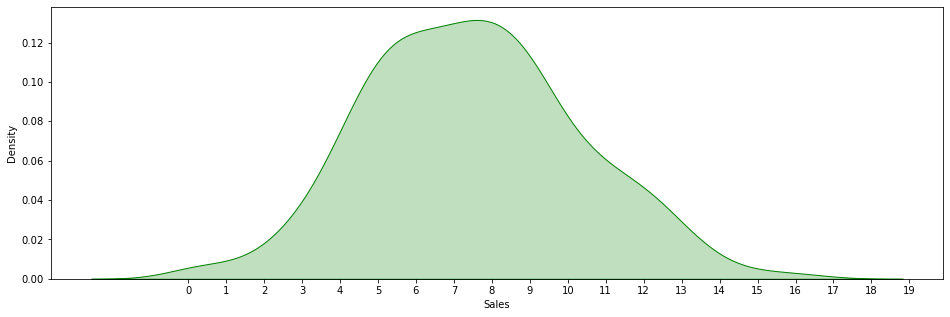

In [12]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(cp['Sales'].skew()))
print("Kurtosis: {}".format(cp['Sales'].kurtosis()))
ax = sns.kdeplot(cp['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

In [13]:
obj_colum = cp.select_dtypes(include='object').columns.tolist()

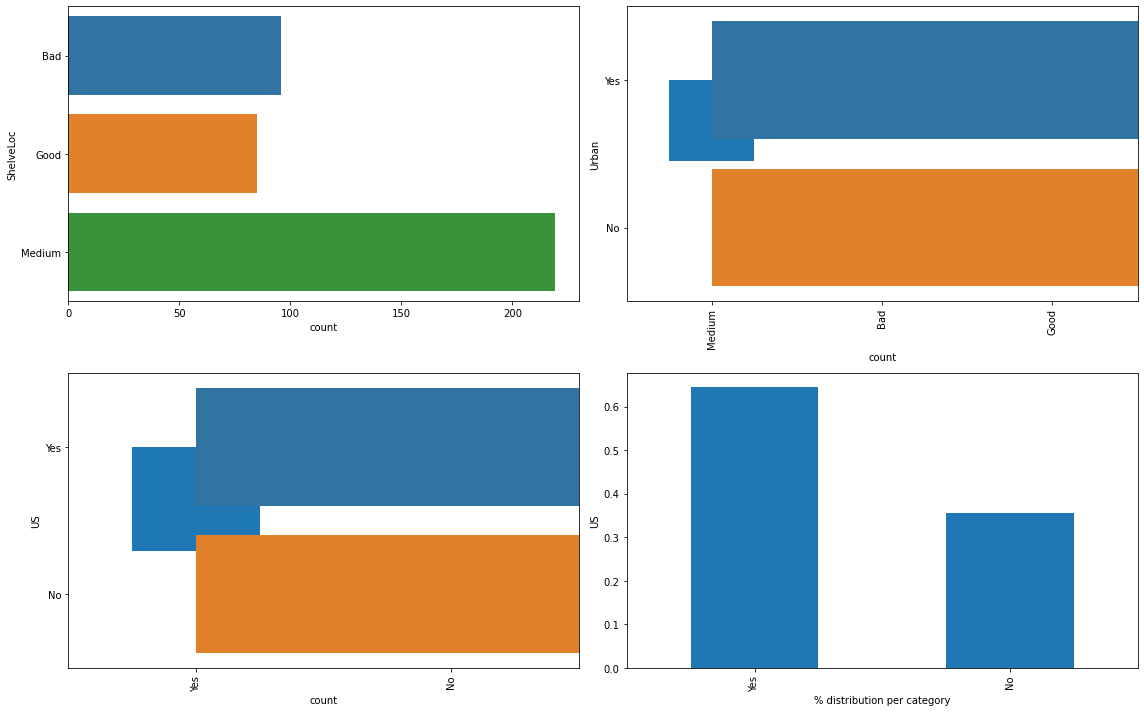

In [14]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=cp,y=col)
    plt.subplot(2,2,i+1)
    cp[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

In [15]:
num_columns = cp.select_dtypes(exclude='object').columns.tolist()

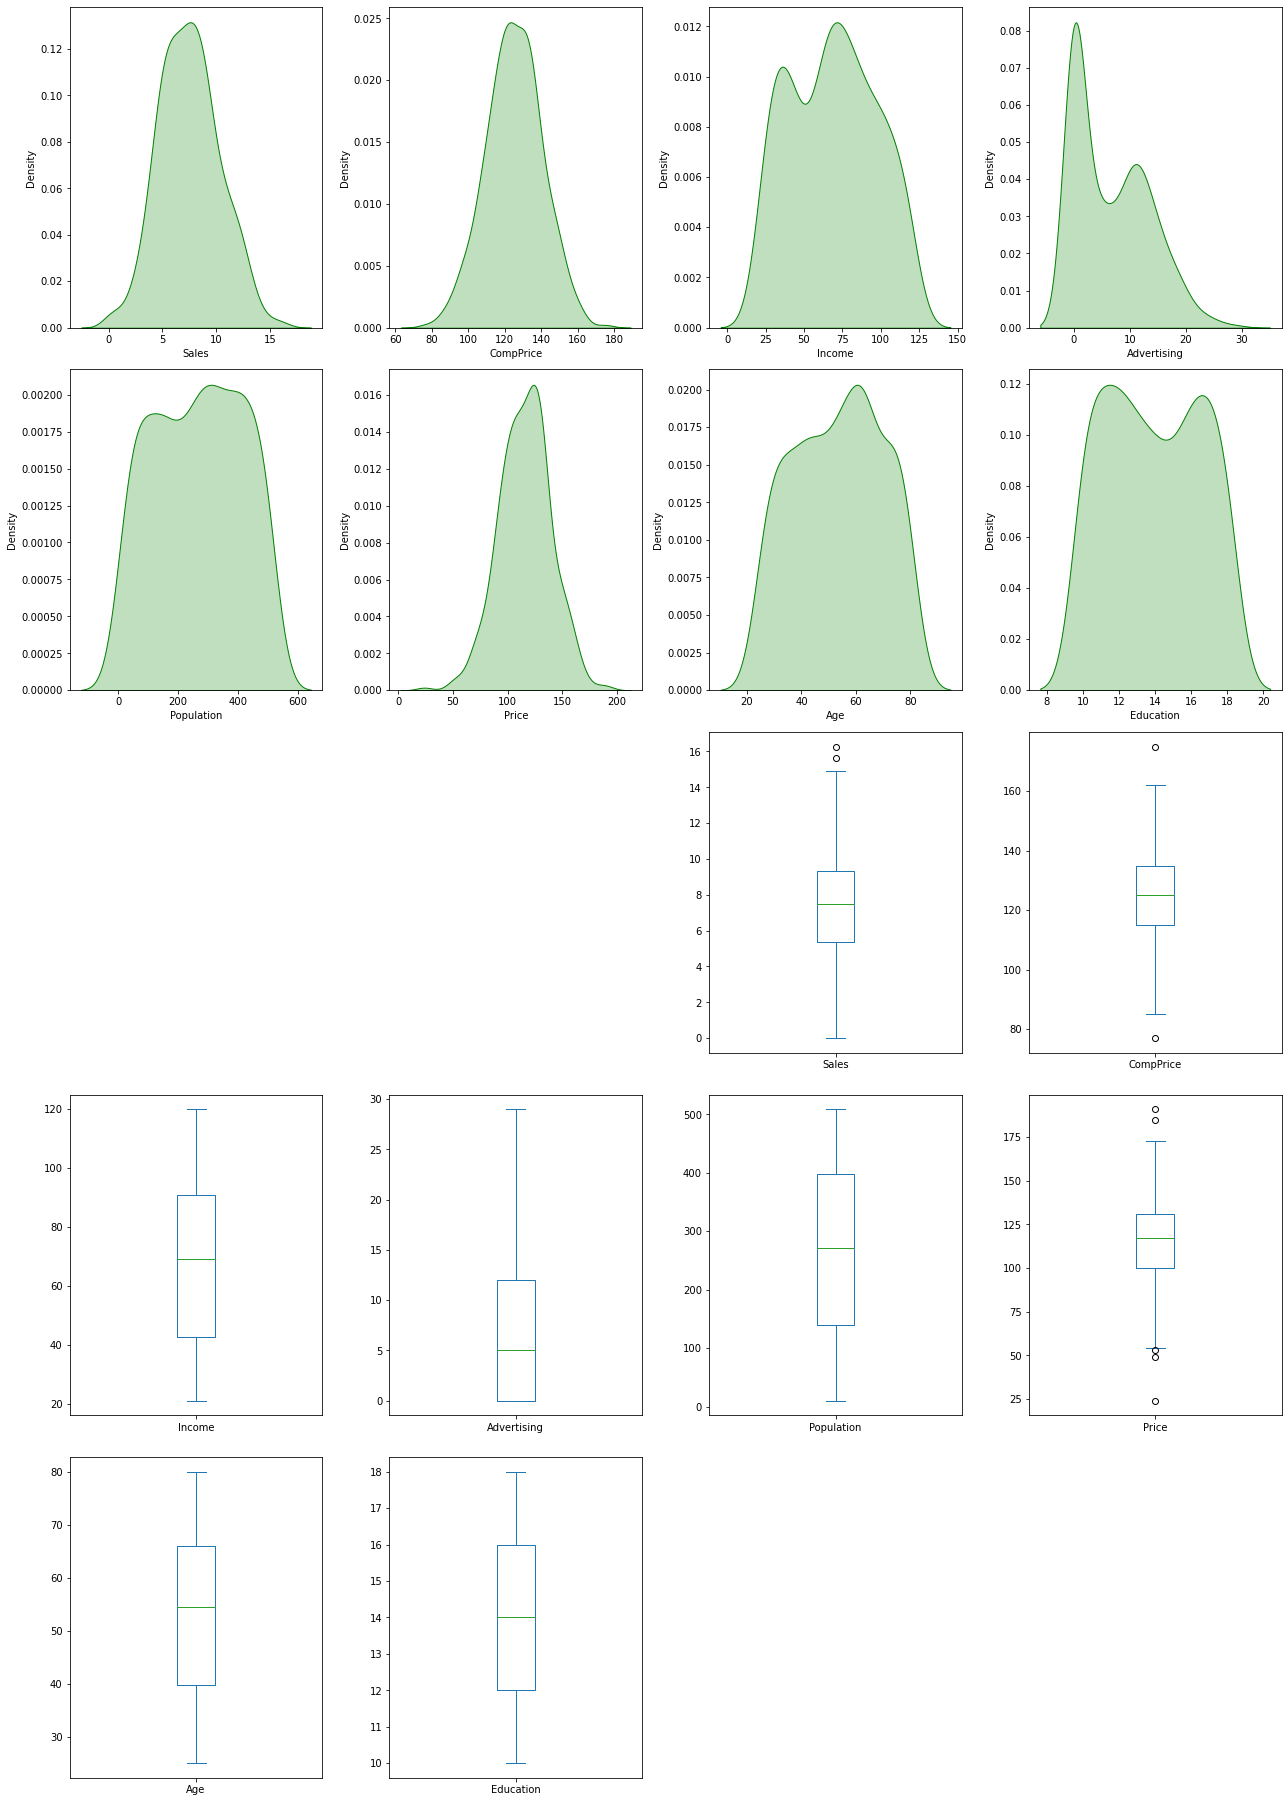

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [16]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [17]:
corr = cp.corr()

In [18]:
cp = pd.get_dummies(cp, columns = ['ShelveLoc','Urban','US'])

In [19]:
corr = cp.corr()

<AxesSubplot:>

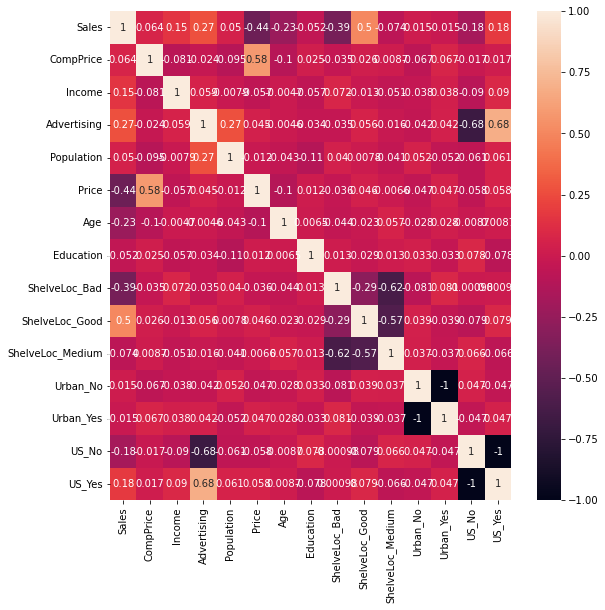

In [20]:
plt.figure(figsize=(9,9))
sns.heatmap(corr,annot=True)

In [22]:
## Random forest model 
cp["sales"]="small"
cp.loc[cp["Sales"]>7.49,"sales"]="large" 
cp.drop(["Sales"],axis=1,inplace=True)

In [23]:
X = cp.iloc[:,0:14]
y = cp.iloc[:,14]

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [25]:
y_train.value_counts()

large    170
small    150
Name: sales, dtype: int64

In [26]:
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.80625

In [27]:
pred_train = model.predict(x_train)

In [28]:
accuracy_score(y_train,pred_train)

1.0

In [29]:
confusion_matrix(y_train,pred_train)

array([[170,   0],
       [  0, 150]], dtype=int64)

In [30]:
pred_test = model.predict(x_test)

In [31]:
accuracy_score(y_test,pred_test)

0.825

In [32]:
confusion_matrix(y_test,pred_test)

array([[26,  3],
       [11, 40]], dtype=int64)

In [33]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [34]:
df_t

,Actual,Predicted
235,small,small
178,large,large
183,small,small
274,small,large
301,small,large
...,...,...
105,small,large
223,small,small
0,large,small
379,small,small


In [35]:
cols = list(cp.columns)

In [36]:
predictors = cols[0:14]
target = cols[14]

In [37]:
tree_1 = model.estimators_[20]

In [38]:
dot_data = StringIO()

In [40]:
export_graphviz(tree_1, out_file = dot_data, feature_names =predictors, class_names = target, filled =True,rounded=True,impurity =False,proportion=False,precision =2)

In [41]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [42]:
graph.write_png('company_full.png')

True

In [45]:
rf_small = RF(n_estimators=10, max_depth = 3)

In [46]:
rf_small.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [47]:
tree_2 = rf_small.estimators_[5]

In [48]:
export_graphviz(tree_2, out_file = dot_data, feature_names = predictors, rounded = True, precision = 1)

In [49]:
graph_small = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [50]:
graph.write_png('company_small.png')

True

In [51]:
img = mpimg.imread('company_small.png')

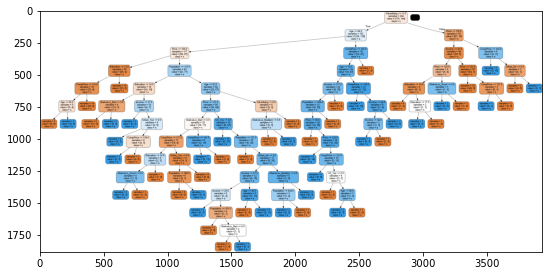

In [52]:
plt.imshow(img)

In [53]:
model.feature_importances_

array([0.11681958, 0.11288816, 0.10112454, 0.08974263, 0.2314091 ,
       0.11332396, 0.0604889 , 0.04182303, 0.06045165, 0.02312873,
       0.01251256, 0.01246092, 0.01277409, 0.01105216])

In [54]:
Final = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [55]:
Final

,feature,importance
4,Price,0.231409
0,CompPrice,0.116820
5,Age,0.113324
1,Income,0.112888
2,Advertising,0.101125
3,Population,0.089743
6,Education,0.060489
8,ShelveLoc_Good,0.060452
7,ShelveLoc_Bad,0.041823
9,ShelveLoc_Medium,0.023129


In [57]:
print("The most important feature is price") 

The most important feature is price
